# LAB 4

## The Sloan Digital Sky Survey which offers public data of space observations.
## This dataset consists of 10,000 records of observations of space taken by the Sloan Digital Sky Survey. Every observation is described by 17 feature columns and 1 target column which identifies the observation to be a star, a galaxy or a quasar

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split

In [9]:
import warnings
warnings.filterwarnings('ignore')

In [10]:
%matplotlib inline
sns.set_style('darkgrid')

In [11]:
plt.rcParams['figure.figsize'] = (15.0, 12.0)

In [14]:
data = pd.read_csv("D:\Downloads\sloan-digital-sky-survey\Skyserver.csv", parse_dates = [0], error_bad_lines=False)

# Overview of Data
## Labels
#### So what exactly are stars, galaxies, and quasars? Had you asked me prior to starting this project, I would’ve not been able to answer (shame on me). Fortunately, Faraz’s notebook succinctly summarises what they are:

##### A GALAXY is a gravitationally bound system of stars, stellar remnants, interstellar gas, dust, and dark matter. Galaxies are categorised according to their visual morphology as elliptical, spiral, or irregular. Many galaxies are thought to have supermassive black holes at their active centers.
##### A STAR is a type of astronomical object consisting of a luminous spheroid of plasma held together by its own gravity. The nearest star to Earth is the Sun.
##### A QUASAR, also known as quasi-stellar object, is an extremely luminous active galactic nucleus (AGN). The power radiated by quasars is enormous. The most powerful quasars have luminosities exceeding 1041 watts, thousands of times greater than an ordinary large galaxy such as the Milky Way.

## Features
### A summary of the more important features are:
#### - ra, dec — right ascension and declination respectively
#### - u, g, r, i, z — filter bands (a.k.a. photometric system or astronomical magnitudes)
#### - run, rerun, camcol, field — descriptors of fields (i.e. 2048 x 1489 pixels) within image
#### - redshift — increase in wavelength due to motion of astronomical object
#### - plate — plate number
#### - mjd — modified Julian date of observation
#### - fiberid — optic fiber ID

#### "U" stands for ultraviolet. "G" stands for green. "R" stands for red. "I" stands for infrared.

In [15]:
data.head()

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,1.23765E+18,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,301,4,267,3.722360e+18,STAR,-0.000009,3306,54922,491
1,1.23765E+18,183.598371,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,301,4,267,3.638140e+17,STAR,-0.000055,323,51615,541
2,1.23765E+18,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,301,4,268,3.232740e+17,GALAXY,0.123111,287,52023,513
3,1.23765E+18,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,301,4,269,3.722370e+18,STAR,-0.000111,3306,54922,510
4,1.23765E+18,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,301,4,269,3.722370e+18,STAR,0.000590,3306,54922,512


In [16]:
data.describe()

,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,redshift,plate,mjd,fiberid
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.0,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000
mean,175.529987,14.836148,18.619355,17.371931,16.840963,16.583579,16.422833,981.034800,301.0,3.648700,302.380100,1.645022e+18,0.143726,1460.986400,52943.533300,353.069400
std,47.783439,25.212207,0.828656,0.945457,1.067764,1.141805,1.203188,273.305024,0.0,1.666183,162.577763,2.013998e+18,0.388774,1788.778371,1511.150651,206.298149
min,8.235100,-5.382632,12.988970,12.799550,12.431600,11.947210,11.610410,308.000000,301.0,1.000000,11.000000,2.995780e+17,-0.004136,266.000000,51578.000000,1.000000
25%,157.370946,-0.539035,18.178035,16.815100,16.173333,15.853705,15.618285,752.000000,301.0,2.000000,184.000000,3.389248e+17,0.000081,301.000000,51900.000000,186.750000
50%,180.394514,0.404166,18.853095,17.495135,16.858770,16.554985,16.389945,756.000000,301.0,4.000000,299.000000,4.966580e+17,0.042591,441.000000,51997.000000,351.000000
75%,201.547279,35.649397,19.259232,18.010145,17.512675,17.258550,17.141447,1331.000000,301.0,5.000000,414.000000,2.881300e+18,0.092579,2559.000000,54468.000000,510.000000
max,260.884382,68.542265,19.599900,19.918970,24.802040,28.179630,22.833060,1412.000000,301.0,6.000000,768.000000,9.468830e+18,5.353854,8410.000000,57481.000000,1000.000000


In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
objid        10000 non-null object
ra           10000 non-null float64
dec          10000 non-null float64
u            10000 non-null float64
g            10000 non-null float64
r            10000 non-null float64
i            10000 non-null float64
z            10000 non-null float64
run          10000 non-null int64
rerun        10000 non-null int64
camcol       10000 non-null int64
field        10000 non-null int64
specobjid    10000 non-null float64
class        10000 non-null object
redshift     10000 non-null float64
plate        10000 non-null int64
mjd          10000 non-null int64
fiberid      10000 non-null int64
dtypes: float64(9), int64(7), object(2)
memory usage: 1.4+ MB


In [18]:
data.columns

Index(['objid', 'ra', 'dec', 'u', 'g', 'r', 'i', 'z', 'run', 'rerun', 'camcol',
       'field', 'specobjid', 'class', 'redshift', 'plate', 'mjd', 'fiberid'],
      dtype='object')

In [19]:
data.isna().sum()

objid        0
ra           0
dec          0
u            0
g            0
r            0
i            0
z            0
run          0
rerun        0
camcol       0
field        0
specobjid    0
class        0
redshift     0
plate        0
mjd          0
fiberid      0
dtype: int64

### Importing NaveBayes classifier from given probabilistic

In [24]:
from probabilistic import NaiveBayes

In [25]:
data['class'] = data['class'].astype('category').cat.codes

In [26]:
X = data.drop(['class'], axis=1).values
y = data['class'].values

In [29]:
Xt, Xs, yt, ys = train_test_split(X,y,test_size=0.3)
print(Xt.shape,yt.shape,Xs.shape,ys.shape)

(7000, 17) (7000,) (3000, 17) (3000,)


### Dimensionality reduction

In [31]:
from sklearn.preprocessing import StandardScaler

In [32]:
features = ['u','g','r', 'i', 'z'];

# Normalization of the features
x = data.loc[:, features].values
x = StandardScaler().fit_transform(x)

### PCA

In [33]:
from sklearn.decomposition import PCA

In [34]:
pca = PCA(n_components=2)

prinComp = pca.fit_transform(x)

ugriz_pca = pd.DataFrame(data = prinComp, columns = ['ugriz_pca1','ugriz_pca2'])

In [35]:
final_data = pd.concat([data[['ra']], data[['dec']], ugriz_pca, data[['redshift']], data[['class']], data[['mjd']] ], axis = 1)

In [36]:
final_data.head()

,ra,dec,ugriz_pca1,ugriz_pca2,redshift,class,mjd
0,183.531326,0.089693,-1.063661,-1.605619,-0.000009,2,54922
1,183.598371,0.135285,-0.181554,-0.070793,-0.000055,2,51615
2,183.680207,0.126185,1.375966,-0.574447,0.123111,0,52023
3,183.870529,0.049911,-1.504058,0.574015,-0.000111,2,54922
4,183.883288,0.102557,-1.147961,1.290891,0.000590,2,54922


In [37]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, OneHotEncoder
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, precision_score, f1_score

### Feature Scaling before KNN

In [38]:
d = pd.DataFrame(final_data)

In [39]:
scaler = MinMaxScaler()

### Some algorithms don't support categorical classes so we'll have to replace them with numbers

In [40]:
class_num = pd.DataFrame(LabelEncoder().fit_transform(d['class']), columns=['class'])
d.drop(['class'], axis=1, inplace=True)
names = list(d)

In [41]:
d = pd.DataFrame(scaler.fit_transform(d), columns=names)

In [42]:
d = pd.concat([d, class_num], axis=1)

In [43]:
d.head(6)

,ra,dec,ugriz_pca1,ugriz_pca2,redshift,mjd,class
0,0.693832,0.074025,0.441506,0.066876,0.000770,0.566492,2
1,0.694098,0.074642,0.488416,0.216500,0.000762,0.006268,2
2,0.694422,0.074519,0.571244,0.167401,0.023749,0.075385,0
3,0.695175,0.073487,0.418086,0.279360,0.000751,0.566492,2
4,0.695225,0.074199,0.437023,0.349246,0.000882,0.566492,2
5,0.695082,0.075162,0.640700,0.231773,0.000831,0.014908,2


In [44]:
X = scaler.fit_transform(X)
y = y.reshape(-1,1)

In [45]:
display(X)
display(y)

array([[0.        , 0.69383227, 0.07402547, ..., 0.37328094, 0.56649161,
        0.49049049],
       [0.        , 0.69409764, 0.07464221, ..., 0.00699902, 0.006268  ,
        0.54054054],
       [0.        , 0.69442156, 0.07451911, ..., 0.00257859, 0.0753854 ,
        0.51251251],
       ...,
       [0.        , 0.48809742, 0.77172401, ..., 0.86407171, 0.92071828,
        0.62162162],
       [0.        , 0.48779894, 0.77288846, ..., 0.02222495, 0.05065221,
        0.22822823],
       [0.        , 0.4885425 , 0.77359512, ..., 0.02222495, 0.05065221,
        0.23223223]])

array([[2],
       [2],
       [0],
       ...,
       [2],
       [0],
       [0]], dtype=int8)

In [46]:
enc = OneHotEncoder()
y = enc.fit_transform(y).toarray()

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [50]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(7500, 17) (7500, 3) (2500, 17) (2500, 3)


In [51]:
from sklearn.neighbors import KNeighborsClassifier

In [52]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
preds = knn.predict(X_test)
acc_knn = (preds == y_test).sum().astype(float) / len(preds)*100
print("Accuracy of KNN: ", acc_knn)

Accuracy of KNN:  276.84000000000003


In [53]:
accuracy_score(y_test, preds)

0.878

In [54]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.85      0.95      0.90      1232
           1       0.95      0.72      0.82       204
           2       0.93      0.82      0.87      1064

   micro avg       0.89      0.88      0.88      2500
   macro avg       0.91      0.83      0.86      2500
weighted avg       0.89      0.88      0.88      2500
 samples avg       0.88      0.88      0.88      2500



## Logistic Regression

In [62]:
import time

In [64]:
#A cross validation will be performed to ensure the reliability of the results.

#In addition, an isolated training will serve to measure the times and extract a matrix of confusion than will give us a general idea.

x=d.drop('class',axis=1);
y=d['class']

X_train, X_test, y_train, y_test = train_test_split(d.drop('class',axis=1), d['class'], test_size=0.4)

In [60]:
lr = linear_model.LogisticRegression()

In [66]:
SMALL_SIZE = 10
MEDIUM_SIZE = 12
plt.rc('font', size=SMALL_SIZE)
plt.rc('axes', titlesize=MEDIUM_SIZE)
plt.rc('axes', labelsize=MEDIUM_SIZE)
plt.rcParams['figure.dpi']=150

The first iteration of the Logistic Regression gives an accuracy of the 88.38 %
[0=Galaxy 1=Quasar 2=Star]


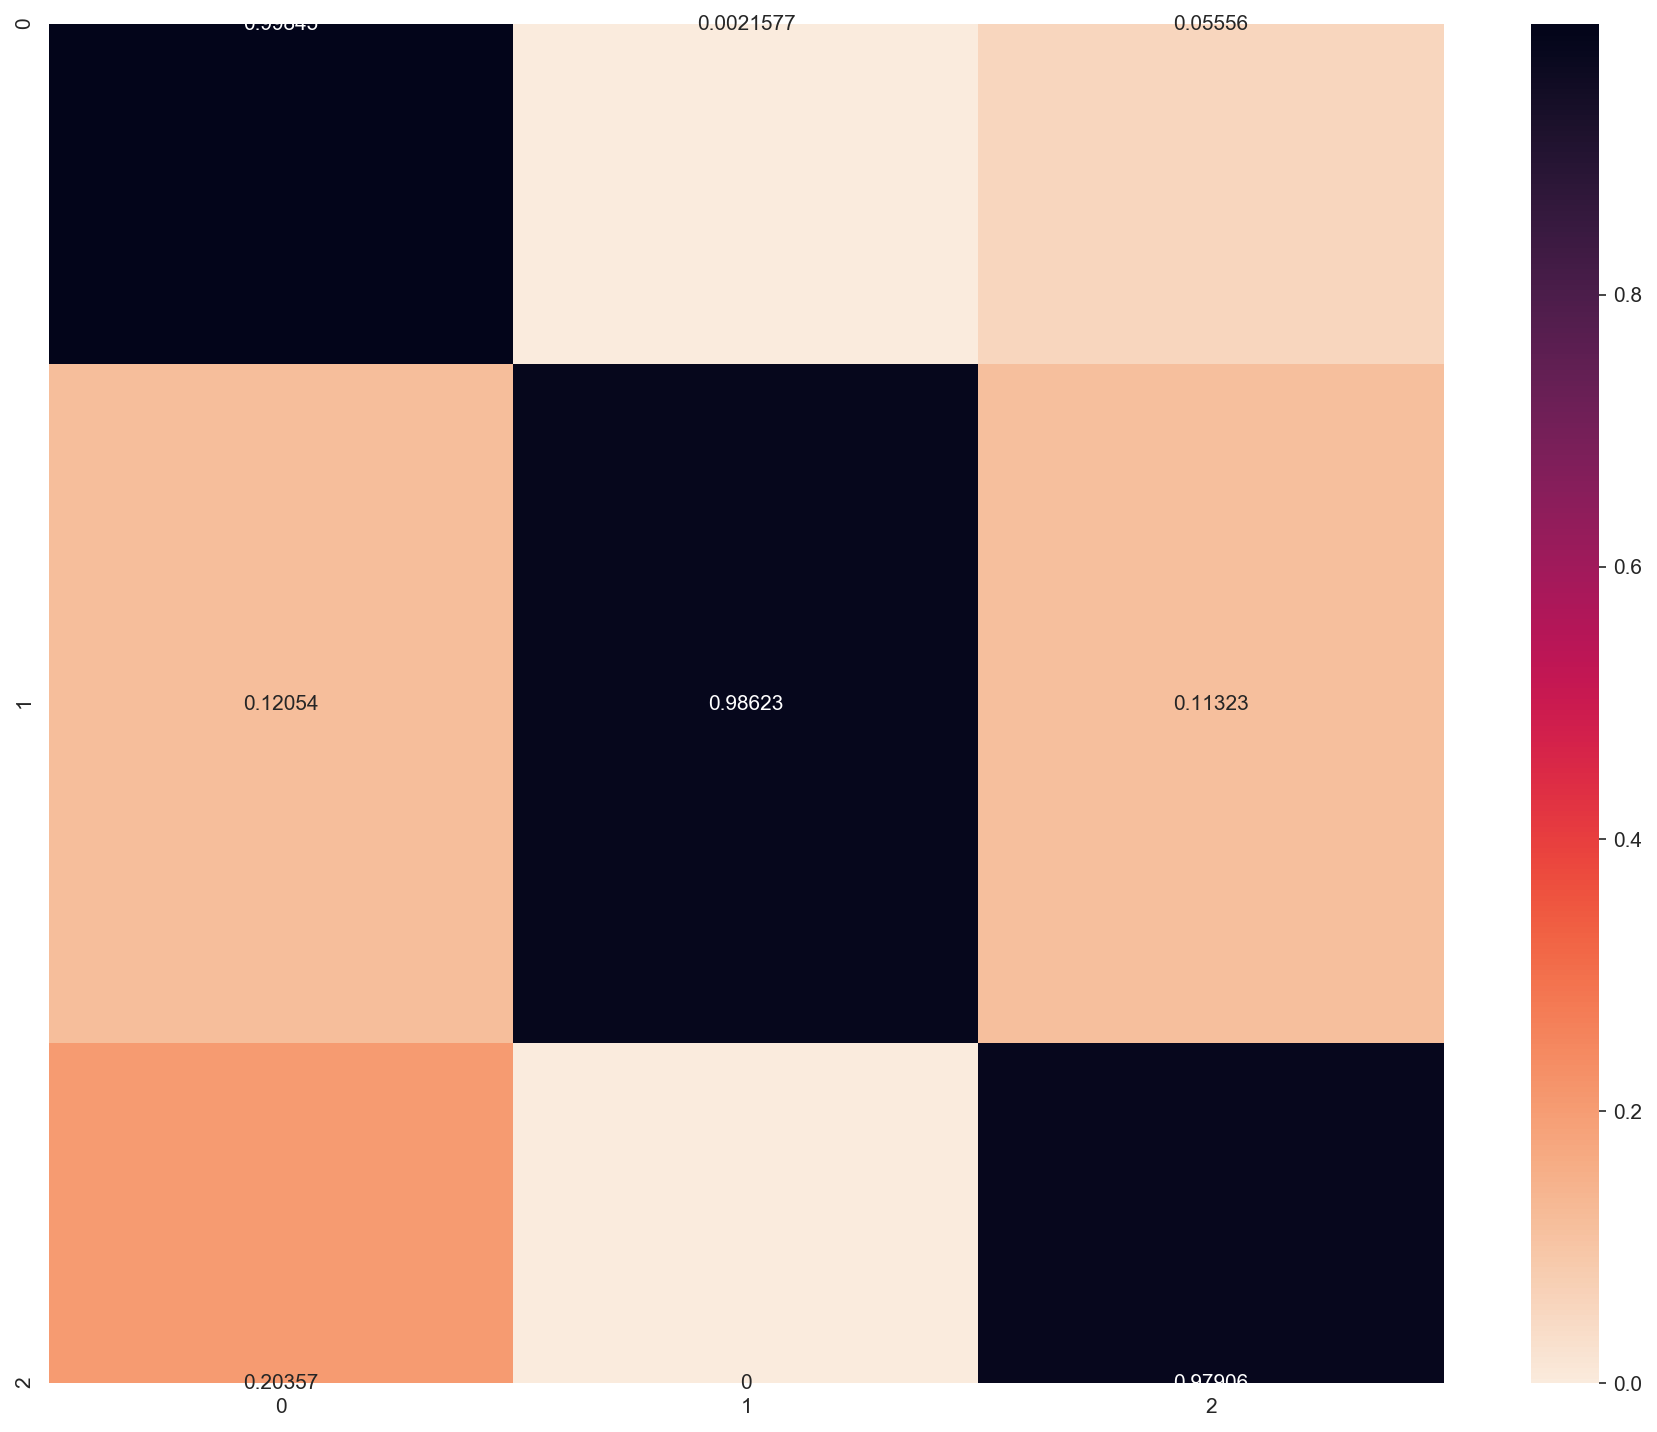

In [67]:
training_start = time.perf_counter()
lr.fit(X_train, y_train)#Training
training_end = time.perf_counter()

predict_start = time.perf_counter()
preds = lr.predict(X_test)#Prediction
predict_end = time.perf_counter()
acc_lreg = (preds == y_test).sum().astype(float) / len(preds)*100

print("The first iteration of the Logistic Regression gives an accuracy of the %3.2f %%" % (acc_lreg))

from numpy import linalg as LA
mc=confusion_matrix(y_test, preds)
mc_norm = mc / np.linalg.norm(mc, axis=1, keepdims=True)
sns.heatmap(pd.DataFrame(mc_norm), cmap=sns.cm.rocket_r, annot=True, fmt='.5g',);

print("[0=Galaxy 1=Quasar 2=Star]")

## Naive Bayes

### Fitting model (Estimating the parameters)

In [56]:
clf = NaiveBayes()

In [69]:
print(X_train)

            ra       dec  ugriz_pca1  ugriz_pca2  redshift       mjd
586   0.954926  0.066069    0.472156    0.147318  0.011772  0.015755
1573  0.632148  0.064835    0.542220    0.190231  0.016344  0.054549
5682  0.762862  0.074513    0.479111    0.313440  0.000819  0.574623
3495  0.668650  0.053087    0.379785    0.297904  0.000726  0.080976
4886  0.670648  0.053130    0.385746    0.212194  0.015783  0.080976
...        ...       ...         ...         ...       ...       ...
6495  0.946698  0.062327    0.527101    0.211121  0.010187  0.071489
3281  0.507460  0.079061    0.530246    0.148986  0.025466  0.058614
9225  0.622541  0.083821    0.443871    0.255163  0.000766  0.055904
3130  0.671986  0.948976    0.376626    0.326063  0.000749  0.125021
2749  0.754781  0.066432    0.532709    0.237015  0.007542  0.068948

[6000 rows x 6 columns]


In [70]:
print(y_train)

586     0
1573    0
5682    2
3495    2
4886    0
       ..
6495    0
3281    0
9225    2
3130    2
2749    0
Name: class, Length: 6000, dtype: int64


In [71]:
X_train = X_train.values
X_train = X_train.astype('float32')

In [74]:
X_test = X_test.values
X_test = X_test.astype('float32')

In [75]:
clf.fit(X_train,y_train)

### Prediction and Accuracy

In [76]:
ytp = clf.predict(X_train)
ysp = clf.predict(X_test)

In [77]:
print('Training Accuracy : ',np.mean(ytp==yt))
print('Testing  Accuracy : ',np.mean(ysp==ys))

Training Accuracy :  0.0
Testing  Accuracy :  0.0


### Predicting probabilities

In [80]:
ytpr = clf.predict_prob(X_train)
yspr = clf.predict_prob(X_test)

In [81]:
ytpr[0]

array([9.9999970e-01, 2.7793146e-07, 8.5187689e-14], dtype=float32)

In [83]:
clf.predict(X_test[0]), clf.predict_prob(X_test[0])

(array([2], dtype=int64),
 array([[1.17844567e-03, 3.85386684e-07, 9.98821169e-01]]))

### Parameters :: $\mu$, $\sigma$

In [85]:
clf.parameters

{0: {'mu': array([0.67094237, 0.2912888 , 0.48460448, 0.1810869 , 0.0157606 ,
         0.07626459], dtype=float32),
  'sig': array([3.5369210e-02, 1.2254689e-01, 7.8285551e-03, 3.0078932e-03,
         6.7659021e-05, 1.1406984e-02], dtype=float32),
  'prior': 0.5066666666666667},
 1: {'mu': array([0.6732976 , 0.3488262 , 0.6554499 , 0.2953139 , 0.22814006,
         0.1804804 ], dtype=float32),
  'sig': array([0.03529299, 0.14387406, 0.00553915, 0.00188344, 0.01698269,
         0.0663966 ], dtype=float32),
  'prior': 0.086},
 2: {'mu': array([0.65171707, 0.24129912, 0.48439866, 0.2587426 , 0.00078132,
         0.42842165], dtype=float32),
  'sig': array([3.89689431e-02, 1.02186665e-01, 1.36780888e-02, 4.44598170e-03,
         5.56892843e-09, 6.15700185e-02], dtype=float32),
  'prior': 0.4073333333333333}}

### Visualizing the distribution

In [93]:
data['class'].value_counts()

0    4998
2    4152
1     850
Name: class, dtype: int64

#### Definitely: 0 = Galaxy (blue), 1 = Qusar (orange), 2 = Star (green).

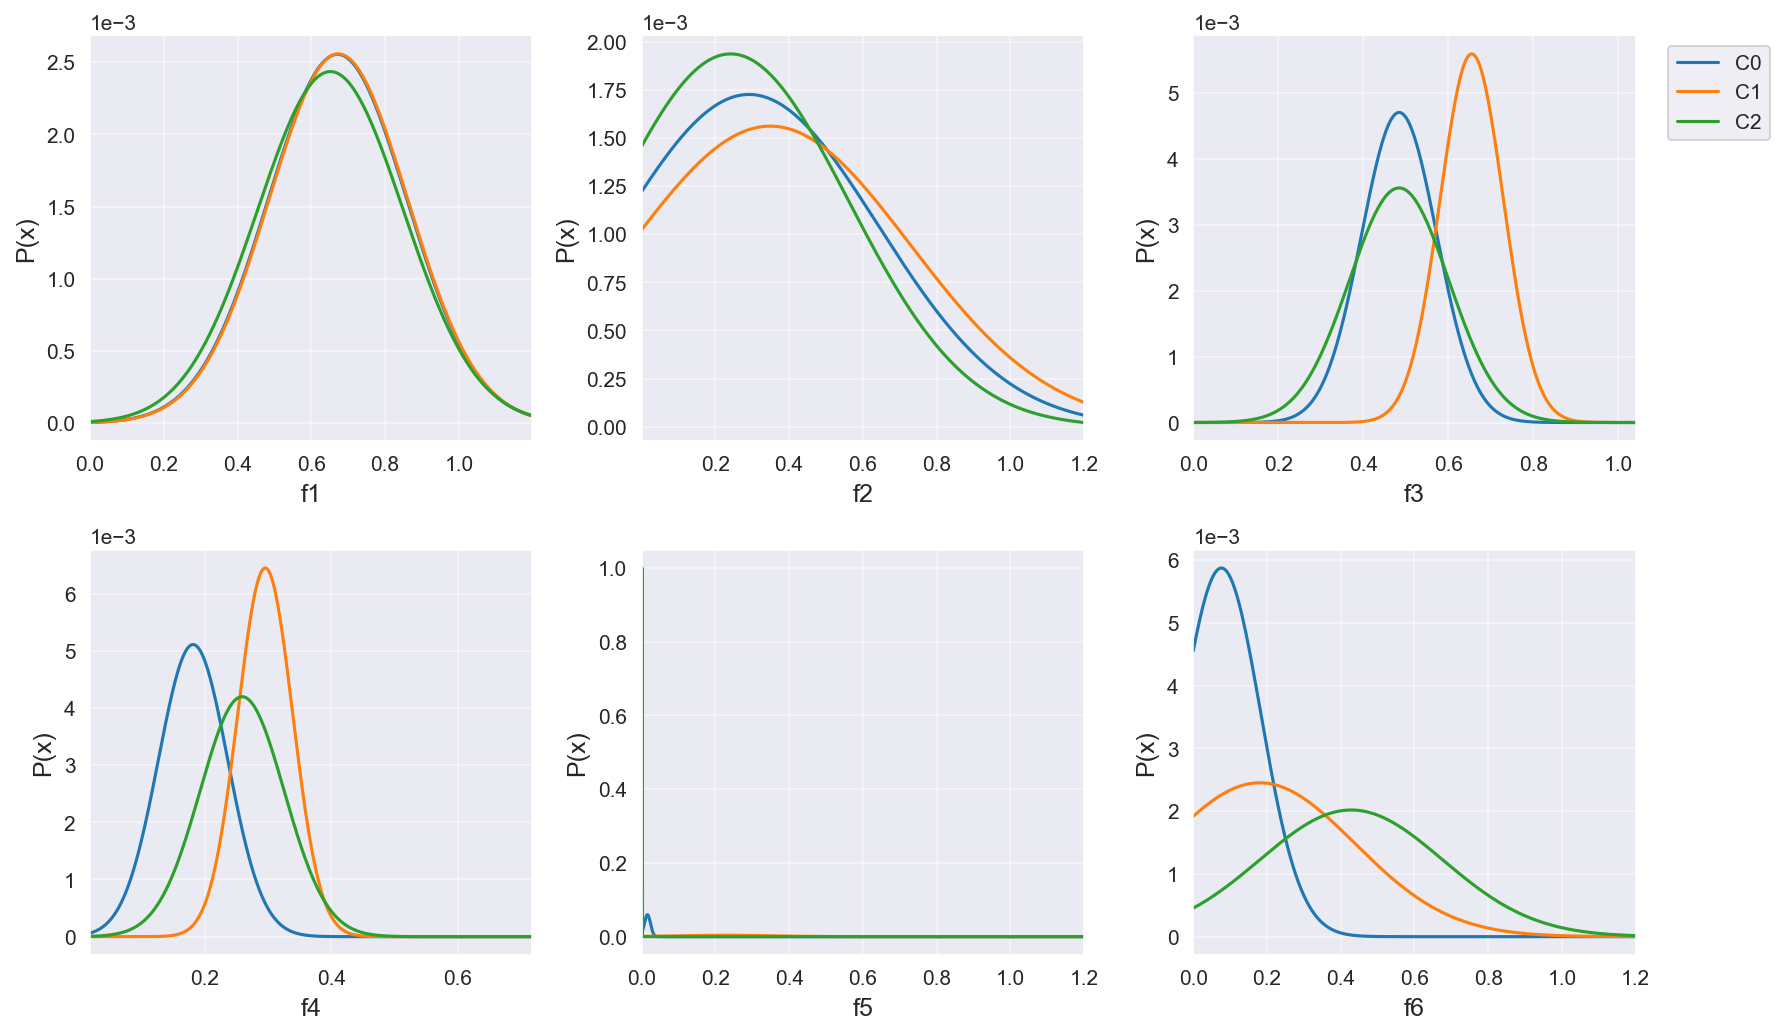

In [87]:
fig = plt.figure(figsize=(12,10))
clf.VizPx()

In [97]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB

In [98]:
#Linear Classifiers:
# 1- Logistic Regression
LRClassifer = LogisticRegression()
#-------------------------------------------------------------------
# 2-Naive Bayes Classifier
NBClassifer = MultinomialNB()
#-------------------------------------------------------------------
#Nearest Neighbor Classifier
NeNeClassifier = KNeighborsClassifier(n_neighbors=3)

In [99]:
LRClassifer.fit(X_train, y_train)
NBClassifer.fit(X_train, y_train)
NeNeClassifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [100]:
y_predsLR = LRClassifer.predict(X_test)
y_predsNB = NBClassifer.predict(X_test)
y_predsNeNe = NeNeClassifier.predict(X_test)

In [101]:
print(y_predsLR[:10],'\n',y_test[:10])
print("*******************************************************")
print(y_predsNB[:10],'\n',y_test[:10])
print("*******************************************************")
print(y_predsNeNe[:10],'\n',y_test[:10])

[0 2 1 0 2 0 0 2 2 0] 
 2393    2
9829    0
259     1
4108    0
5969    2
9490    0
4647    0
1252    2
1688    2
2496    0
Name: class, dtype: int64
*******************************************************
[0 2 0 0 2 0 0 0 2 0] 
 2393    2
9829    0
259     1
4108    0
5969    2
9490    0
4647    0
1252    2
1688    2
2496    0
Name: class, dtype: int64
*******************************************************
[2 0 1 0 2 0 0 2 2 0] 
 2393    2
9829    0
259     1
4108    0
5969    2
9490    0
4647    0
1252    2
1688    2
2496    0
Name: class, dtype: int64


#### Measure accuracy of the classifier

In [102]:
print('accuracy_score by LR Classifier:',accuracy_score(y_true=y_test, y_pred=y_predsLR))
print('accuracy_score by Naive Bayes Classifier:',accuracy_score(y_true=y_test, y_pred=y_predsNB))
print('accuracy_score by Nearest Neighbor Classifier:',accuracy_score(y_true=y_test, y_pred=y_predsNeNe))

accuracy_score by LR Classifier: 0.88375
accuracy_score by Naive Bayes Classifier: 0.77475
accuracy_score by Nearest Neighbor Classifier: 0.9115


### In my case the Naive Bayes was the worst Classifier